# Digging into the World Population numbers #

The United Nations publish population numbers, for the whole world.The numbers combine todays counts or estimates with projections, how the numbers will evolve. That is a good data set to use python/jupyther/numpy/pandas on.

sources: 
- https://esa.un.org/unpd/wpp/ 
- Download Data Files, switch to "CSV", first file: "All variants" https://esa.un.org/unpd/wpp/DVD/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2017_TotalPopulationBySex.csv

Let's see, what those data says about actual population numbers and growth.


In [1]:
%matplotlib notebook

import pandas as pd  
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import urllib.request
import os, os.path
import math

download the UN data file and store it locally, to speed up later re-runs of this notebook.

In [32]:
url = 'https://esa.un.org/unpd/wpp/DVD/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2017_TotalPopulationBySex.csv'
filename = 'WPP2017_TotalPopulationBySex.csv'



if not os.path.exists(filename):
    print('download %s from %s' % (filename, url))
    urllib.request.urlretrieve(url, filename)    

df = pd.read_csv(filename)

df.head()


download WPP2017_TotalPopulationBySex.csv from https://esa.un.org/unpd/wpp/DVD/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2017_TotalPopulationBySex.csv


,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.118
1,4,Afghanistan,2,Medium,1951,1951.5,4134.477,3705.031,7839.510
2,4,Afghanistan,2,Medium,1952,1952.5,4173.993,3760.979,7934.980
3,4,Afghanistan,2,Medium,1953,1953.5,4217.860,3820.747,8038.596
4,4,Afghanistan,2,Medium,1954,1954.5,4266.104,3884.348,8150.447


# Explanations #

## Total population by sex, annually from 1950 to 2100. ##
- PopMale: Total male population (thousands)
- PopFemale: Total female population (thousands)
- PopTotal: Total population, both sexes (thousands)
- Lcation: countries and continents 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371007 entries, 0 to 371006
Data columns (total 9 columns):
LocID        371007 non-null int64
Location     371007 non-null object
VarID        371007 non-null int64
Variant      371007 non-null object
Time         371007 non-null int64
MidPeriod    371007 non-null float64
PopMale      371007 non-null float64
PopFemale    371007 non-null float64
PopTotal     371007 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 25.5+ MB


The dataset contains several models or variants. 

In [4]:
df.Variant.unique()

array(['Medium', 'High', 'Low', 'Constant fertility',
       'Instant replacement', 'Zero migration', 'Constant mortality',
       'No change', 'Momentum'], dtype=object)

I am going to use the 'Medium' variant.


In [5]:
variant = 'Medium'

In [6]:
countries_now = df.loc[(df['Time'] == 2017) & (df['Variant'] == variant)]

countries_now

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal
67,4,Afghanistan,2,Medium,2017,2017.5,18309.892,17220.191,35530.081
218,903,Africa,2,Medium,2017,2017.5,627391.689,628876.383,1256268.025
369,8,Albania,2,Medium,2017,2017.5,1479.140,1451.035,2930.187
520,12,Algeria,2,Medium,2017,2017.5,20866.391,20451.757,41318.142
671,16,American Samoa,2,Medium,2017,2017.5,27.880,27.769,55.641
822,20,Andorra,2,Medium,2017,2017.5,39.078,37.889,76.965
973,24,Angola,2,Medium,2017,2017.5,14605.260,15178.925,29784.193
1124,660,Anguilla,2,Medium,2017,2017.5,7.403,7.503,14.909
1275,28,Antigua and Barbuda,2,Medium,2017,2017.5,48.966,53.045,102.012
1426,32,Argentina,2,Medium,2017,2017.5,21667.864,22603.172,44271.041


let's plot the population of Germany over time

In [7]:
germany = df.loc[(df['Location'] == 'Germany') & (df['Variant'] == variant)]
#germany = germany.loc[germany['Variant'] == variant]

germany.head(10)

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal
13741,276,Germany,2,Medium,1950,1950.5,32283.905,37682.347,69966.243
13742,276,Germany,2,Medium,1951,1951.5,32476.638,37822.713,70299.358
13743,276,Germany,2,Medium,1952,1952.5,32661.822,37957.677,70619.499
13744,276,Germany,2,Medium,1953,1953.5,32836.754,38092.502,70929.259
13745,276,Germany,2,Medium,1954,1954.5,33001.641,38231.496,71233.131
13746,276,Germany,2,Medium,1955,1955.5,33159.553,38377.983,71537.537
13747,276,Germany,2,Medium,1956,1956.5,33316.690,38534.302,71850.980
13748,276,Germany,2,Medium,1957,1957.5,33482.125,38701.790,72183.916
13749,276,Germany,2,Medium,1958,1958.5,33667.141,38880.901,72548.042
13750,276,Germany,2,Medium,1959,1959.5,33884.040,39071.206,72955.244


<IPython.core.display.Javascript object>


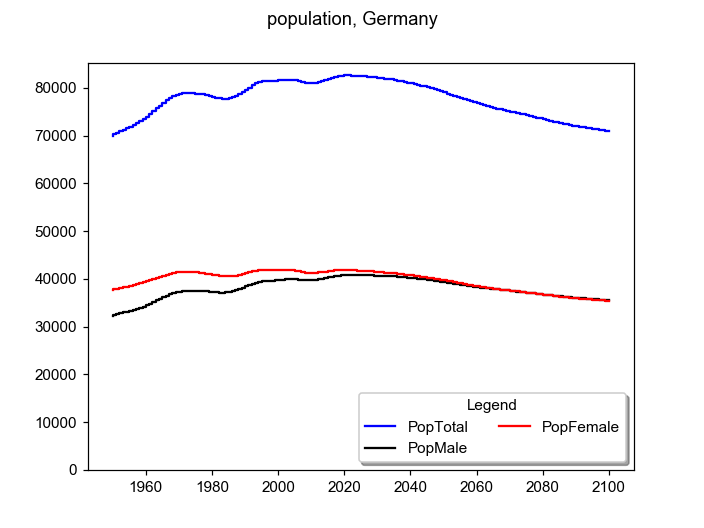

In [8]:
fig, ax = plt.subplots(1)
ys=[(germany.PopTotal, 'blue'), (germany.PopMale, 'black') , (germany.PopFemale, 'red')]
for what, col in ys:
    ax.plot(germany.Time, what, drawstyle='steps', color=col)

ax.set_ylim(ymin=0)
fig.suptitle('population, Germany')
plt.legend(loc='lower right', ncol=2, shadow=True, title="Legend", fancybox=True)
plt.show(fig)

In [9]:
all_locations = df.Location.unique()

all_locations

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Australia', 'Australia/New Zealand',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean', 'Caribbean Netherlands', 'Cayman Islands',
       'Central African Republic', 'Central America', 'Central Asia',
       'Chad', 'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, Taiwan Province of China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', '

you can see, that there are aggregations, that are clearly no countries, like "World", "Eastern Europe", etc

In [10]:
# what are the continents? how did the UN split the world up?
locations = ['Africa', 'Asia', 'Northern America', 'Latin America and the Caribbean', 'Europe', 'Oceania', ]

# this is the pop, as stated by the data under the label "World"
world_pop_verify = df[(df['Time'] == 2017) & (df['Location'] == 'World') & (df['Variant'] == variant)].PopTotal.values[0]


# collect the world by the "contintent"-like regions tha the data has.
regions_now = df.loc[(df['Time'] == 2017) & (df['Location'].isin(locations)) & (df['Variant'] == variant) ]
regions_popsum = regions_now.PopTotal.sum()

print(regions_popsum, world_pop_verify)

assert(math.isclose(regions_popsum, world_pop_verify))

7550262.101 7550262.101


Meaning that we have 7.5 billion people across the planet, for 2017


In [11]:
regions_now.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 218 to 27398
Data columns (total 9 columns):
LocID        6 non-null int64
Location     6 non-null object
VarID        6 non-null int64
Variant      6 non-null object
Time         6 non-null int64
MidPeriod    6 non-null float64
PopMale      6 non-null float64
PopFemale    6 non-null float64
PopTotal     6 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 480.0+ bytes


create a column that tracks the percentage of that row (of the PopTotal column)

In [12]:
regions_now.is_copy = False

regions_now['PopPercentage'] = regions_now['PopTotal'] / regions_popsum * 100.0

#regions_now.sort_values(by=['PopPercentage'], inplace=True, ascending=False)
regions_now

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopPercentage
218,903,Africa,2,Medium,2017,2017.5,627391.689,628876.383,1256268.025,16.638734
1879,935,Asia,2,Medium,2017,2017.5,2304731.371,2199696.948,4504428.373,59.659232
12147,908,Europe,2,Medium,2017,2017.5,358540.341,383533.547,742073.853,9.828452
19093,904,Latin America and the Caribbean,2,Medium,2017,2017.5,319085.098,326508.078,645593.253,8.550607
26794,905,Northern America,2,Medium,2017,2017.5,178827.590,182380.220,361207.811,4.784043
27398,909,Oceania,2,Medium,2017,2017.5,20356.269,20334.500,40690.786,0.538932


<IPython.core.display.Javascript object>


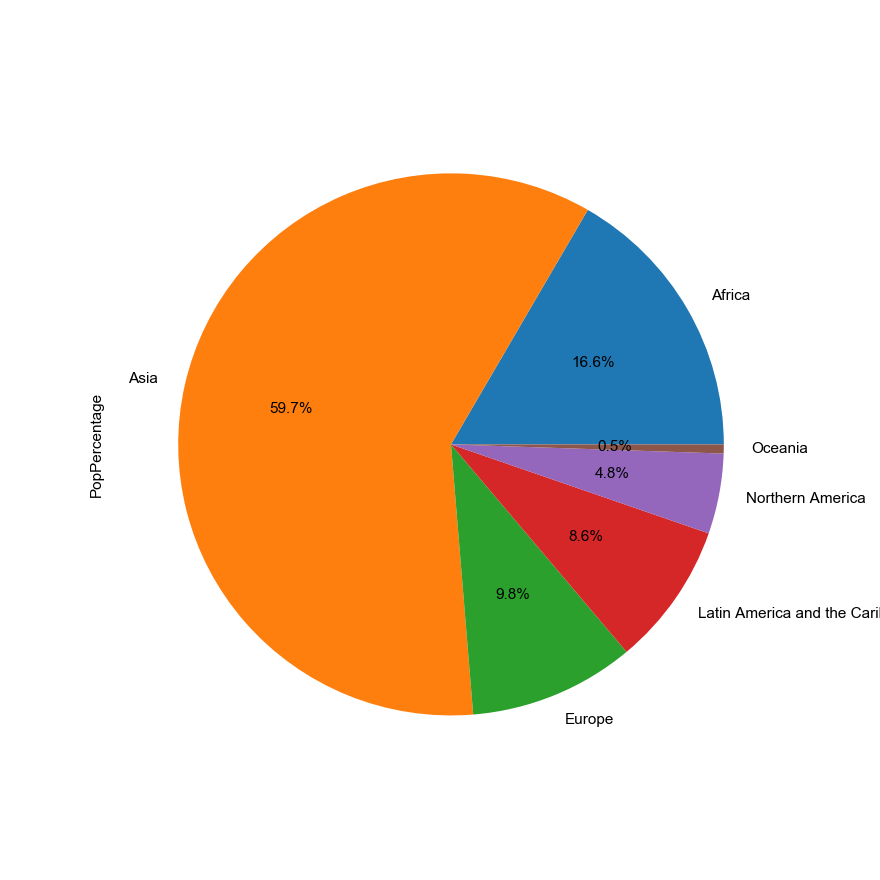

In [13]:
fig = regions_now.plot.pie(y='PopPercentage',  labels=regions_now['Location'], autopct='%1.1f%%' , figsize=(8, 8), legend=False)

plt.show(fig)

list the n largest countries by PopTotal

In [14]:
#countries_now.is_copy = False

countries_now = df.loc[(df['Time'] == 2017) & (df['Variant'] == variant) & (df['LocID']<900)].copy()
countries_now['PopPercentage'] = countries_now['PopTotal'] / world_pop_verify * 100.0
countries_now.sort_values(by=['PopTotal'], inplace=True, ascending=False)

countries_now
               
               

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopPercentage
7466,156,China,2,Medium,2017,2017.5,726320.207,683197.190,1409517.397,18.668457
16526,356,India,2,Medium,2017,2017.5,693958.763,645221.368,1339180.127,17.736869
38723,840,United States of America,2,Medium,2017,2017.5,160593.072,163866.396,324459.463,4.297327
16677,360,Indonesia,2,Medium,2017,2017.5,132898.395,131092.981,263991.379,3.496453
4597,76,Brazil,2,Medium,2017,2017.5,102855.016,106433.262,209288.278,2.771934
27700,586,Pakistan,2,Medium,2017,2017.5,101199.351,95816.601,197015.955,2.609392
26341,566,Nigeria,2,Medium,2017,2017.5,96729.235,94157.078,190886.311,2.528208
2936,50,Bangladesh,2,Medium,2017,2017.5,83035.767,81633.974,164669.751,2.180981
30116,643,Russian Federation,2,Medium,2017,2017.5,66917.298,77072.462,143989.754,1.907083
23170,484,Mexico,2,Medium,2017,2017.5,64311.945,64851.331,129163.276,1.710712


In [15]:
countries_now['PopMalePercentage'] = countries_now['PopMale'] / countries_now['PopTotal'] * 100.0
countries_now['PopFemalePercentage'] = countries_now['PopFemale'] / countries_now['PopTotal'] * 100.0

countries_now.sort_values(by=['PopMalePercentage'], inplace=True, ascending=True)

countries_now

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopPercentage,PopMalePercentage,PopFemalePercentage
22415,474,Martinique,2,Medium,2017,2017.5,175.135,209.772,384.896,0.005098,45.501902,54.500956
9278,531,Curaçao,2,Medium,2017,2017.5,73.561,86.976,160.539,0.002126,45.821265,54.177490
19244,428,Latvia,2,Medium,2017,2017.5,895.418,1054.254,1949.670,0.025823,45.926644,54.073459
7617,344,"China, Hong Kong SAR",2,Medium,2017,2017.5,3386.765,3978.118,7364.883,0.097545,45.985320,54.014680
20754,440,Lithuania,2,Medium,2017,2017.5,1331.613,1558.678,2890.297,0.038281,46.071840,53.927953
38119,804,Ukraine,2,Medium,2017,2017.5,20445.567,23777.389,44222.947,0.585714,46.232936,53.767084
14714,312,Guadeloupe,2,Medium,2017,2017.5,208.375,241.198,449.568,0.005954,46.350052,53.651061
15922,336,Holy See,2,Medium,2017,2017.5,0.368,0.430,0.792,0.000010,46.464646,54.292929
30116,643,Russian Federation,2,Medium,2017,2017.5,66917.298,77072.462,143989.754,1.907083,46.473653,53.526352
3238,112,Belarus,2,Medium,2017,2017.5,4405.973,5062.365,9468.338,0.125404,46.533753,53.466247


# Development of the Population #

In [16]:
regions = ['Africa', 'Asia', 'Northern America', 'Latin America and the Caribbean', 'Europe', 'Oceania',]

tmp = df.loc[(df['Location'].isin(regions)) & (df['Variant'] == variant) ].copy()

#print(type(tmp.Time.unique()))
years = tmp.Time.unique()
# filter to only every 5th year:
years = [y for y in years if y % 5 == 0]
         
         
popdev = pd.DataFrame(pd.Series(years, dtype='int16'), columns=['Time'])
popdev.Time = popdev.Time.astype(int)
#df.a = df.a.astype(float)
popdev.set_index('Time', inplace=True)
#popdev.rename_axis('Time')
popdev.index.name = "Time"

popdev = pd.concat([popdev,pd.DataFrame(columns=regions)])

for region in regions:
    for year in list(years):
        popdev.loc[[year], [region]] = tmp.loc[(tmp['Location'] == region) & (tmp['Time'] == year)].PopTotal.values[0]

    
#world_pop_verify = df[(df['Time'] == 2017) & (df['Location'] == 'World') & (df['Variant'] == variant)].PopTotal.values[0]

#popdev.drop()
                 
popdev

,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania
1950,228670,1.40406e+06,549375,168918,172603,12647.8
1955,253995,1.54614e+06,577110,193224,187594,14176.7
1960,285142,1.70046e+06,605925,221051,204807,15825.2
1965,322471,1.89123e+06,635332,253378,219612,17571.2
1970,366459,2.13783e+06,657350,288077,231145,19718
1975,417898,2.39434e+06,677605,325267,242472,21506.9
1980,480012,2.64249e+06,694207,364284,254414,23005.1
1985,552796,2.91595e+06,708227,405060,266816,24929.4
1990,634567,3.22134e+06,721699,445919,280345,27071.5
1995,722922,3.48931e+06,728085,486863,295114,29185.3


<IPython.core.display.Javascript object>


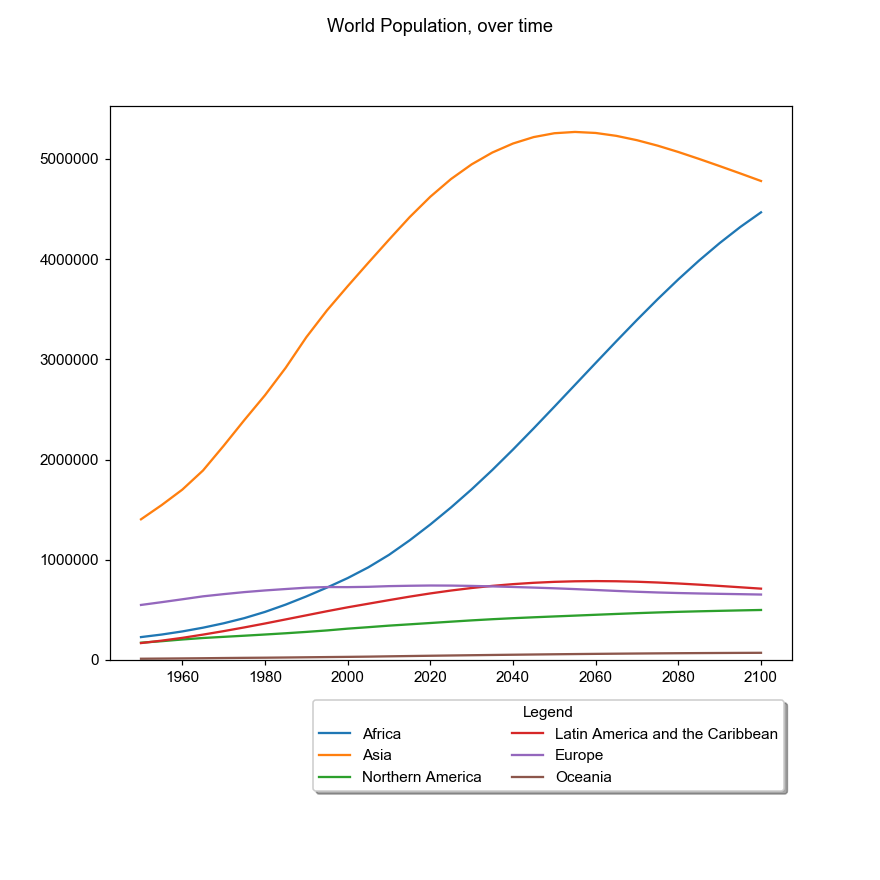

In [17]:
fig, ax = plt.subplots(1, figsize=(8, 8))
for region in regions:
    ax.plot(popdev.index, popdev[region])

ax.set_ylim(ymin=0)
fig.subplots_adjust(bottom=0.25)

fig.suptitle('World Population, over time')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.1))
plt.legend(loc='lower right', ncol=2, shadow=True, title="Legend", bbox_to_anchor=(1,-0.25))
#fig.savefig('samplefigure', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show(fig)

or in a stacked graph, to see the cumulative effect:

<IPython.core.display.Javascript object>


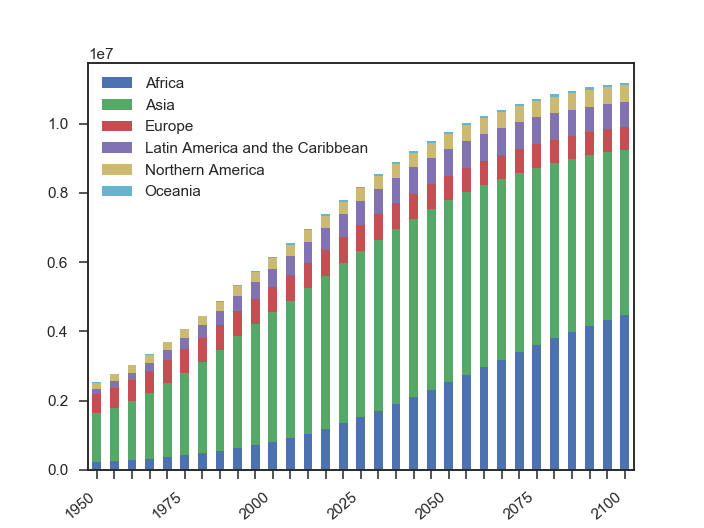

In [18]:
sns.set()
sns.set_style("ticks")
ax = popdev.plot(kind='bar', stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

so Africa is the fastest growing region - the other regions don't grow / don't grow fast. Overall the growth is projected to slow very much down.

The dataset has now easy way to filter the african countries out - it would be interesting to see where the growth is. So let's do it the other way: look for the fastest growing countries.

In [30]:
y1 = 2017
y2 = 2100

tmp = df.loc[(df['Time'].isin([y1, y2])) & (df['Variant'] == variant) ].copy()

dfg = pd.DataFrame(all_locations, columns=['Location'])


dfg['GrowthAbs'] = None # tmp[tmp['Time'] == y2].PopTotal.values[0] - tmp[tmp['Time'] == y1].PopTotal.values[0]
dfg['GrowthPercentage'] = None
dfg['GrowthPercentagePerYear'] = None
dfg['GrowthRank'] = None
dfg[str(y1)] = None
dfg[str(y2)] = None
#dfg.set_index('Location')

rows, cols = dfg.shape

for idx in range(rows):
    l = dfg.iloc[idx].Location
    p1 = tmp[(tmp['Location'] == l) & (tmp['Time'] == y1)].PopTotal.values[0]
    p2 = tmp[(tmp['Location'] == l) & (tmp['Time'] == y2)].PopTotal.values[0]
    growth = (p2 - p1) #/ p1
    dfg.loc[idx, ['GrowthAbs']] = growth 
    dfg.loc[idx, ['GrowthPercentage']] = growth / p1 * 100
    dfg.loc[idx, ['GrowthPercentagePerYear']] = (growth / p1 * 100) / (y2-y1)
    dfg.loc[idx, [str(y1)]] = p1 
    dfg.loc[idx, [str(y2)]] = p2 

#dfg.loc['StartPop'] = df.loc[(df['Time'] == y1) & (df['Variant'] == variant) ].PopTotal.values[0]

dfg.sort_values(by=['GrowthPercentage'], inplace=True, ascending=False)
for idx in range(rows):
    dfg.iloc[idx].GrowthRank = idx+1

dfg

,Location,GrowthAbs,GrowthPercentage,GrowthPercentagePerYear,GrowthRank,2017,2100
173,Niger,170709,794.834,9.57631,1,21477.3,192187
6,Angola,143077,480.378,5.78769,2,29784.2,172861
271,Zambia,77315.5,452.293,5.44931,3,17094.1,94409.6
219,Somalia,64229.4,435.674,5.24909,4,14742.5,78971.9
255,United Republic of Tanzania,246522,430.155,5.18259,5,57310,303832
35,Burundi,43649.3,401.771,4.84061,6,10864.2,54513.6
251,Uganda,170895,398.701,4.80363,7,42863,213758
65,Democratic Republic of the Congo,297635,365.915,4.40862,8,81340,378975
156,Middle Africa,589649,360.653,4.34521,9,163495,753144
164,Mozambique,105378,355.179,4.27927,10,29668.8,135046


and wie see: lot's of african countries. #20 is the first non african location, if I got that right. (Middle Africa and Western Africa are aggregations - but still)

the quickest growing countries are projected to grow (in number of people) by 9.5% per year!

In [31]:
dfg[(dfg['Location'] == 'Germany')]

,Location,GrowthAbs,GrowthPercentage,GrowthPercentagePerYear,GrowthRank,2017,2100
91,Germany,-11080.9,-13.4945,-0.162585,213,82114.2,71033.3
